In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
categorical = pd.read_csv('categorical.csv')
numerical = pd.read_csv('numerical.csv')
target = pd.read_csv('target.csv')

data = pd.concat([categorical,numerical,target],axis=1)

In [4]:
data.head()

,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,...,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,TARGET_B,TARGET_D
0,IL,36,H,F,3,L,E,C,T,2,...,12.0,10.0,4,7.741935,95515,0,4,39,0,0.0
1,CA,14,H,M,3,L,G,A,S,1,...,25.0,25.0,18,15.666667,148535,0,2,1,0,0.0
2,NC,43,U,M,3,L,E,C,R,2,...,16.0,5.0,12,7.481481,15078,1,4,60,0,0.0
3,CA,44,U,F,3,L,E,C,R,2,...,11.0,10.0,9,6.812500,172556,1,4,41,0,0.0
4,FL,16,H,F,3,L,F,A,S,2,...,15.0,15.0,14,6.864865,7112,1,2,26,0,0.0


In [5]:
target_d = data[data['TARGET_D']!=0]

In [6]:
nulls = [column for column in data if data[column].isna().sum() > 0]
nulls  

[]

In [7]:
data['TARGET_B'].value_counts()

0    90569
1     4843
Name: TARGET_B, dtype: int64

In [8]:
no_donate = data[data['TARGET_B']==0]
yes_donate = data[data['TARGET_B']==1]

from sklearn.utils import resample
yes_donate_oversampled = resample(yes_donate, 
                                    replace=True,
                                    n_samples = len(no_donate),
                                    random_state=42)


display(no_donate.shape)
display(yes_donate_oversampled.shape)

(90569, 339)

(90569, 339)

In [9]:
oversampled = pd.concat([no_donate,yes_donate_oversampled])

In [10]:
#X-Y Split, train-test split

X = oversampled.drop(['TARGET_B','TARGET_D'],axis=1)
y = oversampled['TARGET_B']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [12]:
#cat/num X-train
#make a split between the continuous and discrete variables as I don't want to scale or encode the discrete ones, I want to keep their current values
X_train_num = X_train.select_dtypes(include = np.number)
X_train_cat = X_train.select_dtypes(object)

#cat/num X-test
X_test_num = X_test.select_dtypes(include = np.number)
X_test_cat = X_test.select_dtypes(object)


from sklearn.preprocessing import StandardScaler
#Scale X-train
transformer = StandardScaler().fit(X_train_num)
X_scaled_train = pd.DataFrame(transformer.transform(X_train_num),columns=X_train_num.columns)

#Scale X-test
X_scaled_test = pd.DataFrame(transformer.transform(X_test_num),columns=X_test_num.columns)
X_scaled_test

,CLUSTER,DATASRCE,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,...,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,1.182838,0.626022,0.159428,0.531017,-0.029559,-1.320474,-0.311571,1.334569,-0.617088,0.963573,...,-0.329634,0.286884,0.237411,0.623210,-0.444501,0.537244,1.554770,-0.998298,0.829085,-1.159685
1,-0.000362,0.626022,0.159428,1.112893,-0.029559,-1.320474,-0.311571,0.960959,-0.099493,0.412726,...,-0.964663,0.832180,-0.167817,-0.092231,0.148719,0.218165,-0.954379,-0.998298,-0.949825,-0.947620
2,-1.392363,-0.973903,1.535152,-0.050858,-0.029559,0.994498,2.598269,-0.159871,1.194494,0.412726,...,-0.752987,0.286884,0.237411,0.623210,0.593634,0.386909,0.868392,-0.998298,-0.949825,-0.152375
3,0.138838,0.626022,1.535152,1.403831,-0.029559,-1.320474,-0.311571,1.334569,-1.393481,0.963573,...,-0.964663,1.377477,0.034797,0.265490,0.148719,0.678375,1.082045,-0.998298,-0.949825,1.013985
4,-0.000362,-2.573828,0.159428,-0.050858,-0.029559,0.346306,-0.634886,-0.159871,0.676899,0.412726,...,-0.964663,0.286884,-0.127294,-0.020687,-1.186026,-0.057962,-1.699336,-0.998298,-0.949825,-1.053652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54337,1.113238,0.626022,0.159428,-1.505548,-0.029559,-1.320474,-0.311571,1.334569,-1.393481,0.412726,...,2.633833,-0.258413,-0.370430,-0.807672,-0.444501,-0.677155,-1.219564,-0.998298,1.718541,-1.530799
54338,1.391639,0.626022,0.159428,-0.923672,-0.029559,-1.320474,-0.311571,-0.533481,0.935697,-0.138120,...,0.093718,-0.476531,-0.167817,-0.163775,2.224989,-0.426131,0.260573,-0.998298,-0.949825,1.491132
54339,1.391639,-0.973903,0.159428,-0.923672,-0.029559,-1.320474,-0.311571,-0.907091,-0.358291,-2.341506,...,0.305394,-0.694650,0.034797,-0.449952,0.297024,-0.173015,0.771088,-0.998298,-0.060370,1.491132
54340,1.252439,0.626022,0.159428,-1.505548,-0.029559,-0.301886,0.981691,-0.159871,0.935697,0.963573,...,0.728747,-0.258413,-0.137425,-0.038573,-0.444501,-0.266974,1.406762,1.001705,0.829085,1.491132


In [13]:
from sklearn.preprocessing import OneHotEncoder
#Create encoder
encoder = OneHotEncoder(drop='first').fit(X_train_cat)

#encode train
encoded_train = encoder.transform(X_train_cat).toarray()
encoded_train = pd.DataFrame(encoded_train)

#encode test
encoded_test = encoder.transform(X_test_cat).toarray()
encoded_test = pd.DataFrame(encoded_test)

In [14]:
train_scaled = pd.concat([encoded_train,X_scaled_train],axis=1)
test_scaled = pd.concat([encoded_test,X_scaled_test],axis=1)
df = pd.concat([test_scaled,train_scaled],axis=0)

In [15]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20)
clf.fit(train_scaled, y_train)
print(clf.score(train_scaled, y_train))
print(clf.score(test_scaled, y_test))

/Users/yingyingyhy/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/yingyingyhy/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.6162733840184232


/Users/yingyingyhy/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.6138898089875234


In [16]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20)
cross_val_scores = cross_val_score(clf, train_scaled, y_train, cv=10)
print(np.mean(cross_val_scores))
print(cross_val_scores)

/Users/yingyingyhy/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/yingyingyhy/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/yingyingyhy/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/yingyingyhy/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An er

0.6125509119503348
[0.60646688 0.6134858  0.60678233 0.6112776  0.61380126 0.61805994
 0.61045824 0.61211452 0.61392854 0.619134  ]


/Users/yingyingyhy/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [17]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [18]:
clf = RandomForestClassifier(max_depth=10,
                             min_samples_split=20,
                             min_samples_leaf =20).fit(train_scaled, y_train)

pred_RF = clf.predict(test_scaled)

print('accuracy:', accuracy_score(y_test, pred_RF))
print("precision: ",precision_score(y_test,pred_RF))
print("recall: ",recall_score(y_test,pred_RF))
print("f1: ",f1_score(y_test,pred_RF))

/Users/yingyingyhy/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/yingyingyhy/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


accuracy: 0.805748776268816
precision:  0.7967193495019184
recall:  0.8256064198431515
f1:  0.8109057036400115


/Users/yingyingyhy/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/yingyingyhy/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


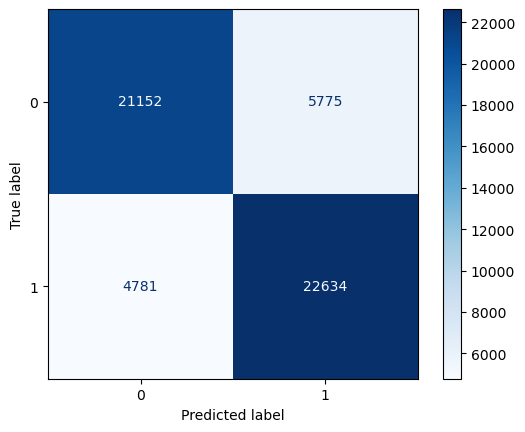

In [19]:
plot_confusion_matrix(clf, test_scaled, y_test,cmap=plt.cm.Blues)  
plt.show()

In [20]:
round(target_d['TARGET_D'].mean(),2)

15.62

In [21]:
donation_gained = 11236 * 15.62
donation_lost = 7018 * 15.62
spend_marketing = (7072+11236) * 0.68
no_return_marketing = 7072 * 0.68

print('Donation amount gained:',round(donation_gained,2))
print('Donation amount lost:',round(donation_lost,2))
print('Amount spend on marketing:',round(spend_marketing,2))
print('Amount lost on marketing:',round(no_return_marketing,2))

Donation amount gained: 175506.32
Donation amount lost: 109621.16
Amount spend on marketing: 12449.44
Amount lost on marketing: 4808.96
